In [ ]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Setting display columns
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read dataset
df = pd.read_json('/content/drive/MyDrive/FinalProject/transactions.json', lines=True)

In [ ]:
#Show data frame
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,0.00,,,,False,,,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,111.33,,,,False,,,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,136.08,,,,False,,,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,01,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,323.48,,,,False,,,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,01,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,550.82,,,,False,,,False


In [ ]:
#Checking Number of Records and attributes
df.shape

(641914, 29)

In [ ]:
#Checking data types
df.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
isFraud                        bool
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd            

In [ ]:
#returns the number of unique values for each column
df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              450690
transactionDateTime         635472
transactionAmount            62735
merchantName                  2493
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1826
dateOfLastAddressChange       2186
cardCVV                        899
enteredCVV                     980
cardLast4Digits               5134
transactionType                  4
isFraud                          2
echoBuffer                       1
currentBalance              406990
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInM

In [ ]:
#get the count for transactionType by ignoring None and Nan values
df.groupby(['transactionType'])['transactionType'].count()

transactionType
                           589
ADDRESS_VERIFICATION     16478
PURCHASE                608685
REVERSAL                 16162
Name: transactionType, dtype: int64

# **Explore** **Data** 

In [ ]:
# converting in datetime format
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])

In [ ]:
#Return top 5 rows of a data frame
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,0.00,,,,False,,,False
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,111.33,,,,False,,,False
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,136.08,,,,False,,,False
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,323.48,,,,False,,,False
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,550.82,,,,False,,,False


In [ ]:
#Checking data types
df.dtypes

accountNumber                        int64
customerId                           int64
creditLimit                          int64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                              int64
enteredCVV                           int64
cardLast4Digits                      int64
transactionType                     object
isFraud                               bool
echoBuffer                          object
currentBalance                     float64
merchantCity                        object
merchantSta

In [ ]:
#find duplicate rows
Dup_Rows = df[df.duplicated()]

print("\n\nDuplicate Rows : \n {}".format(Dup_Rows))



Duplicate Rows : 
 Empty DataFrame
Columns: [accountNumber, customerId, creditLimit, availableMoney, transactionDateTime, transactionAmount, merchantName, acqCountry, merchantCountryCode, posEntryMode, posConditionCode, merchantCategoryCode, currentExpDate, accountOpenDate, dateOfLastAddressChange, cardCVV, enteredCVV, cardLast4Digits, transactionType, isFraud, echoBuffer, currentBalance, merchantCity, merchantState, merchantZip, cardPresent, posOnPremises, recurringAuthInd, expirationDateKeyInMatch]
Index: []


In [ ]:
#check similarity between accountNumber and customerId
df['accountNumber'].equals(df['customerId'])

True

In [ ]:
#check similarity between cardCVV and enteredCVV
df['cardCVV'].equals(df['enteredCVV'])

False

In [ ]:
#create column matchCVV
df['matchCVV']= df['cardCVV']==(df['enteredCVV'])

In [ ]:
#drop column cardCVV and entered CVV
df = df.drop(columns=['cardCVV','enteredCVV'])
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,matchCVV
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,9184,PURCHASE,True,,0.00,,,,False,,,False,True
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,9184,PURCHASE,False,,111.33,,,,False,,,False,True
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,9184,PURCHASE,False,,136.08,,,,False,,,False,True
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,9184,PURCHASE,True,,323.48,,,,False,,,False,True
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,9184,ADDRESS_VERIFICATION,False,,550.82,,,,False,,,False,True


# **Missing** **Value** **Handling**

In [ ]:
#Replacing blank values (white space) with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
#Checking missing value
df.isna().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    3913
merchantCountryCode            624
posEntryMode                  3345
posConditionCode               287
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardLast4Digits                  0
transactionType                589
isFraud                          0
echoBuffer                  641914
currentBalance                   0
merchantCity                641914
merchantState               641914
merchantZip                 641914
cardPresent                      0
posOnPremises               641914
recurringAuthInd            641914
expirationDateKeyInMatch         0
matchCVV                         0
dtype: int64

In [ ]:
#check columns with missing value > 70%
nullvalue = df.isnull().sum()
nullvalue.where((nullvalue/641914) > 0.7).dropna().astype(int)

echoBuffer          641914
merchantCity        641914
merchantState       641914
merchantZip         641914
posOnPremises       641914
recurringAuthInd    641914
dtype: int64

In [ ]:
#Drop columns with missing value > 70%
df = df.drop(columns=['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'])

#Drop column with similary
df = df.drop(columns=['customerId'])

In [ ]:
#Return top 5 rows of a data frame after drop some columns
df.head(5)

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchCVV
0,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,9184,PURCHASE,True,0.00,False,False,True
1,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,9184,PURCHASE,False,111.33,False,False,True
2,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,9184,PURCHASE,False,136.08,False,False,True
3,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,9184,PURCHASE,True,323.48,False,False,True
4,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,9184,ADDRESS_VERIFICATION,False,550.82,False,False,True


In [ ]:
#Fill missing values with mode for data training
na_data = ['acqCountry', 'merchantCountryCode', 'posEntryMode','posConditionCode','transactionType']

for i in na_data:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [ ]:
#Checking missing value
df.isna().sum()

accountNumber               0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
matchCVV                    0
dtype: int64

# **Outliers** **Handling**

In [ ]:
#describe dataframe
df.describe()

,accountNumber,creditLimit,availableMoney,transactionAmount,cardLast4Digits,currentBalance
count,6.419140e+05,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,10697.210608,6652.828573,135.162497,4886.184043,4044.382035
std,2.546884e+08,11460.359133,9227.132275,147.053302,2859.053679,5945.510224
min,1.005471e+08,250.000000,-1244.930000,0.000000,0.000000,0.000000
25%,3.223192e+08,5000.000000,1114.970000,32.320000,2364.000000,502.442500
50%,5.438879e+08,7500.000000,3578.165000,85.800000,4873.000000,2151.860000
75%,7.862277e+08,15000.000000,8169.185000,189.030000,7267.000000,5005.890000
max,9.999853e+08,50000.000000,50000.000000,1825.250000,9998.000000,47496.500000


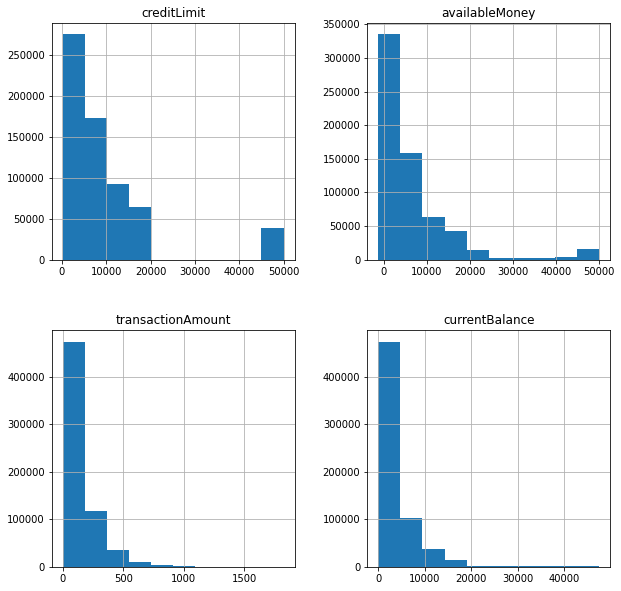

In [ ]:
#visualitation Numerical Valued importance column 
df.hist(column=["creditLimit", "availableMoney", 
                "transactionAmount", "currentBalance"] , figsize = (10, 10))
plt.show()

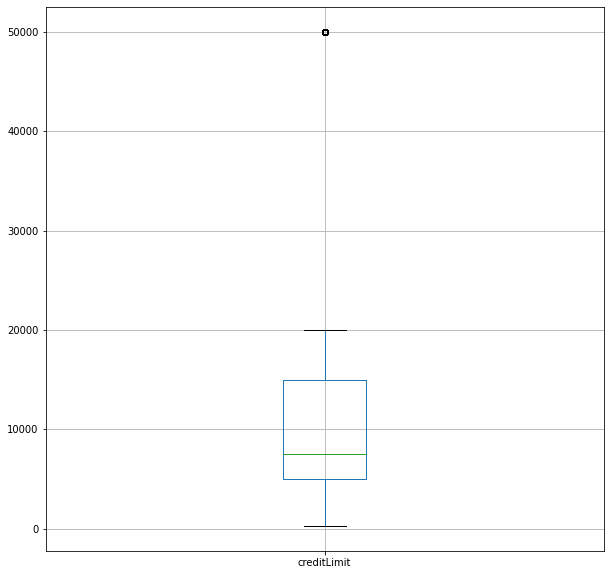

In [ ]:
#show boxplot Numerical Valued column with high correlated
df.boxplot(column=["creditLimit"] , figsize = (10, 10))

In [ ]:
Q1 = df['creditLimit'].quantile(0.25)
Q3 = df['creditLimit'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [ ]:
new_df = df[(df['creditLimit'] > lower_bound) & (df['creditLimit'] < upper_bound)]
new_df

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchCVV
0,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,9184,PURCHASE,True,0.00,False,False,True
1,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,9184,PURCHASE,False,111.33,False,False,True
2,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,9184,PURCHASE,False,136.08,False,False,True
3,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,9184,PURCHASE,True,323.48,False,False,True
4,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,9184,ADDRESS_VERIFICATION,False,550.82,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641909,186770399,7500,2574.02,2016-12-04 12:29:21,5.37,Apple iTunes,US,US,05,08,mobileapps,2030-01-01,2015-11-04,2016-06-03,5432,PURCHASE,False,4925.98,False,False,True
641910,186770399,7500,2568.65,2016-12-09 04:20:35,223.70,Blue Mountain eCards,US,US,09,01,online_gifts,2026-05-01,2015-11-04,2016-06-03,5432,PURCHASE,False,4931.35,False,False,True
641911,186770399,7500,2344.95,2016-12-16 07:58:23,138.42,Fresh Flowers,US,US,02,01,online_gifts,2019-10-01,2015-11-04,2016-06-03,5432,PURCHASE,False,5155.05,False,False,True
641912,186770399,7500,2206.53,2016-12-19 02:30:35,16.31,abc.com,US,US,09,08,online_subscriptions,2029-11-01,2015-11-04,2016-06-03,5432,PURCHASE,False,5293.47,False,False,True


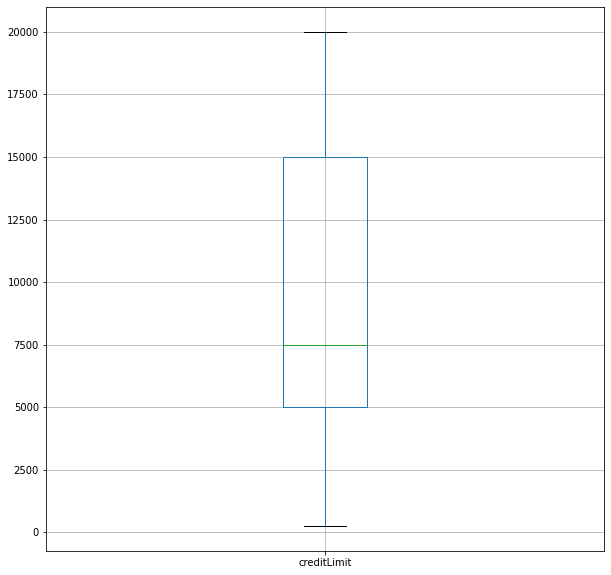

In [ ]:
new_df.boxplot(column=["creditLimit"] , figsize = (10, 10))

In [ ]:
#new_df.to_csv('baru2.csv')
#new_df.to_csv('/content/drive/MyDrive/FinalProject/baru2.csv', index=False)

# **Correlation**

In [ ]:
new_df = new_df.reset_index()

In [ ]:
# extractind year, month, day, hour, minute and seconds from datetime columns
new_df['transactionDateTime_year'] = new_df['transactionDateTime'].dt.year
new_df['transactionDateTime_month'] = new_df['transactionDateTime'].dt.month
new_df['transactionDateTime_day'] = new_df['transactionDateTime'].dt.day
new_df['transactionDateTime_hour'] = new_df['transactionDateTime'].dt.hour
new_df['transactionDateTime_minute'] = new_df['transactionDateTime'].dt.minute
new_df['transactionDateTime_second'] = new_df['transactionDateTime'].dt.second

new_df['currentExpDate_year'] = new_df['currentExpDate'].dt.year
new_df['currentExpDate_month'] = new_df['currentExpDate'].dt.month
new_df['currentExpDate_day'] = new_df['currentExpDate'].dt.day

new_df['accountOpenDate_year'] = new_df['accountOpenDate'].dt.year
new_df['accountOpenDate_month'] = new_df['accountOpenDate'].dt.month
new_df['accountOpenDate_day'] = new_df['accountOpenDate'].dt.day

new_df['dateOfLastAddressChange_year'] = new_df['dateOfLastAddressChange'].dt.year
new_df['dateOfLastAddressChange_month'] = new_df['dateOfLastAddressChange'].dt.month
new_df['dateOfLastAddressChange_day'] = new_df['dateOfLastAddressChange'].dt.day

In [ ]:
# drop datetime column
new_df.drop('transactionDateTime',axis = 1,inplace = True)
new_df.drop('currentExpDate',axis = 1,inplace = True)
new_df.drop('accountOpenDate',axis = 1,inplace = True)
new_df.drop('dateOfLastAddressChange',axis = 1,inplace = True)

In [ ]:
new_df

,index,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchCVV,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,transactionDateTime_hour,transactionDateTime_minute,transactionDateTime_second,currentExpDate_year,currentExpDate_month,currentExpDate_day,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
0,0,733493772,5000,5000.00,111.33,Lyft,US,US,05,01,rideshare,9184,PURCHASE,True,0.00,False,False,True,2016,1,8,19,4,50,2020,4,1,2014,8,3,2014,8,3
1,1,733493772,5000,4888.67,24.75,Uber,US,US,09,01,rideshare,9184,PURCHASE,False,111.33,False,False,True,2016,1,9,22,32,39,2023,6,1,2014,8,3,2014,8,3
2,2,733493772,5000,4863.92,187.40,Lyft,US,US,05,01,rideshare,9184,PURCHASE,False,136.08,False,False,True,2016,1,11,13,36,55,2027,12,1,2014,8,3,2014,8,3
3,3,733493772,5000,4676.52,227.34,Lyft,US,US,02,01,rideshare,9184,PURCHASE,True,323.48,False,False,True,2016,1,11,22,47,46,2029,9,1,2014,8,3,2014,8,3
4,4,733493772,5000,4449.18,0.00,Lyft,US,US,02,01,rideshare,9184,ADDRESS_VERIFICATION,False,550.82,False,False,True,2016,1,16,1,41,11,2024,10,1,2014,8,3,2014,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603870,641909,186770399,7500,2574.02,5.37,Apple iTunes,US,US,05,08,mobileapps,5432,PURCHASE,False,4925.98,False,False,True,2016,12,4,12,29,21,2030,1,1,2015,11,4,2016,6,3
603871,641910,186770399,7500,2568.65,223.70,Blue Mountain eCards,US,US,09,01,online_gifts,5432,PURCHASE,False,4931.35,False,False,True,2016,12,9,4,20,35,2026,5,1,2015,11,4,2016,6,3
603872,641911,186770399,7500,2344.95,138.42,Fresh Flowers,US,US,02,01,online_gifts,5432,PURCHASE,False,5155.05,False,False,True,2016,12,16,7,58,23,2019,10,1,2015,11,4,2016,6,3
603873,641912,186770399,7500,2206.53,16.31,abc.com,US,US,09,08,online_subscriptions,5432,PURCHASE,False,5293.47,False,False,True,2016,12,19,2,30,35,2029,11,1,2015,11,4,2016,6,3


In [ ]:
new_df.dtypes

index                              int64
accountNumber                      int64
creditLimit                        int64
availableMoney                   float64
transactionAmount                float64
merchantName                      object
acqCountry                        object
merchantCountryCode               object
posEntryMode                      object
posConditionCode                  object
merchantCategoryCode              object
cardLast4Digits                    int64
transactionType                   object
isFraud                             bool
currentBalance                   float64
cardPresent                         bool
expirationDateKeyInMatch            bool
matchCVV                            bool
transactionDateTime_year           int64
transactionDateTime_month          int64
transactionDateTime_day            int64
transactionDateTime_hour           int64
transactionDateTime_minute         int64
transactionDateTime_second         int64
currentExpDate_y

In [ ]:
#Encode datatype use LabelEncoder
le = LabelEncoder()
var = ['merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode',
       'posConditionCode', 'merchantCategoryCode', 'transactionType', 'isFraud', 'cardPresent',
       'expirationDateKeyInMatch', 'matchCVV']
for i in var:
    new_df[i] = le.fit_transform(new_df[i])

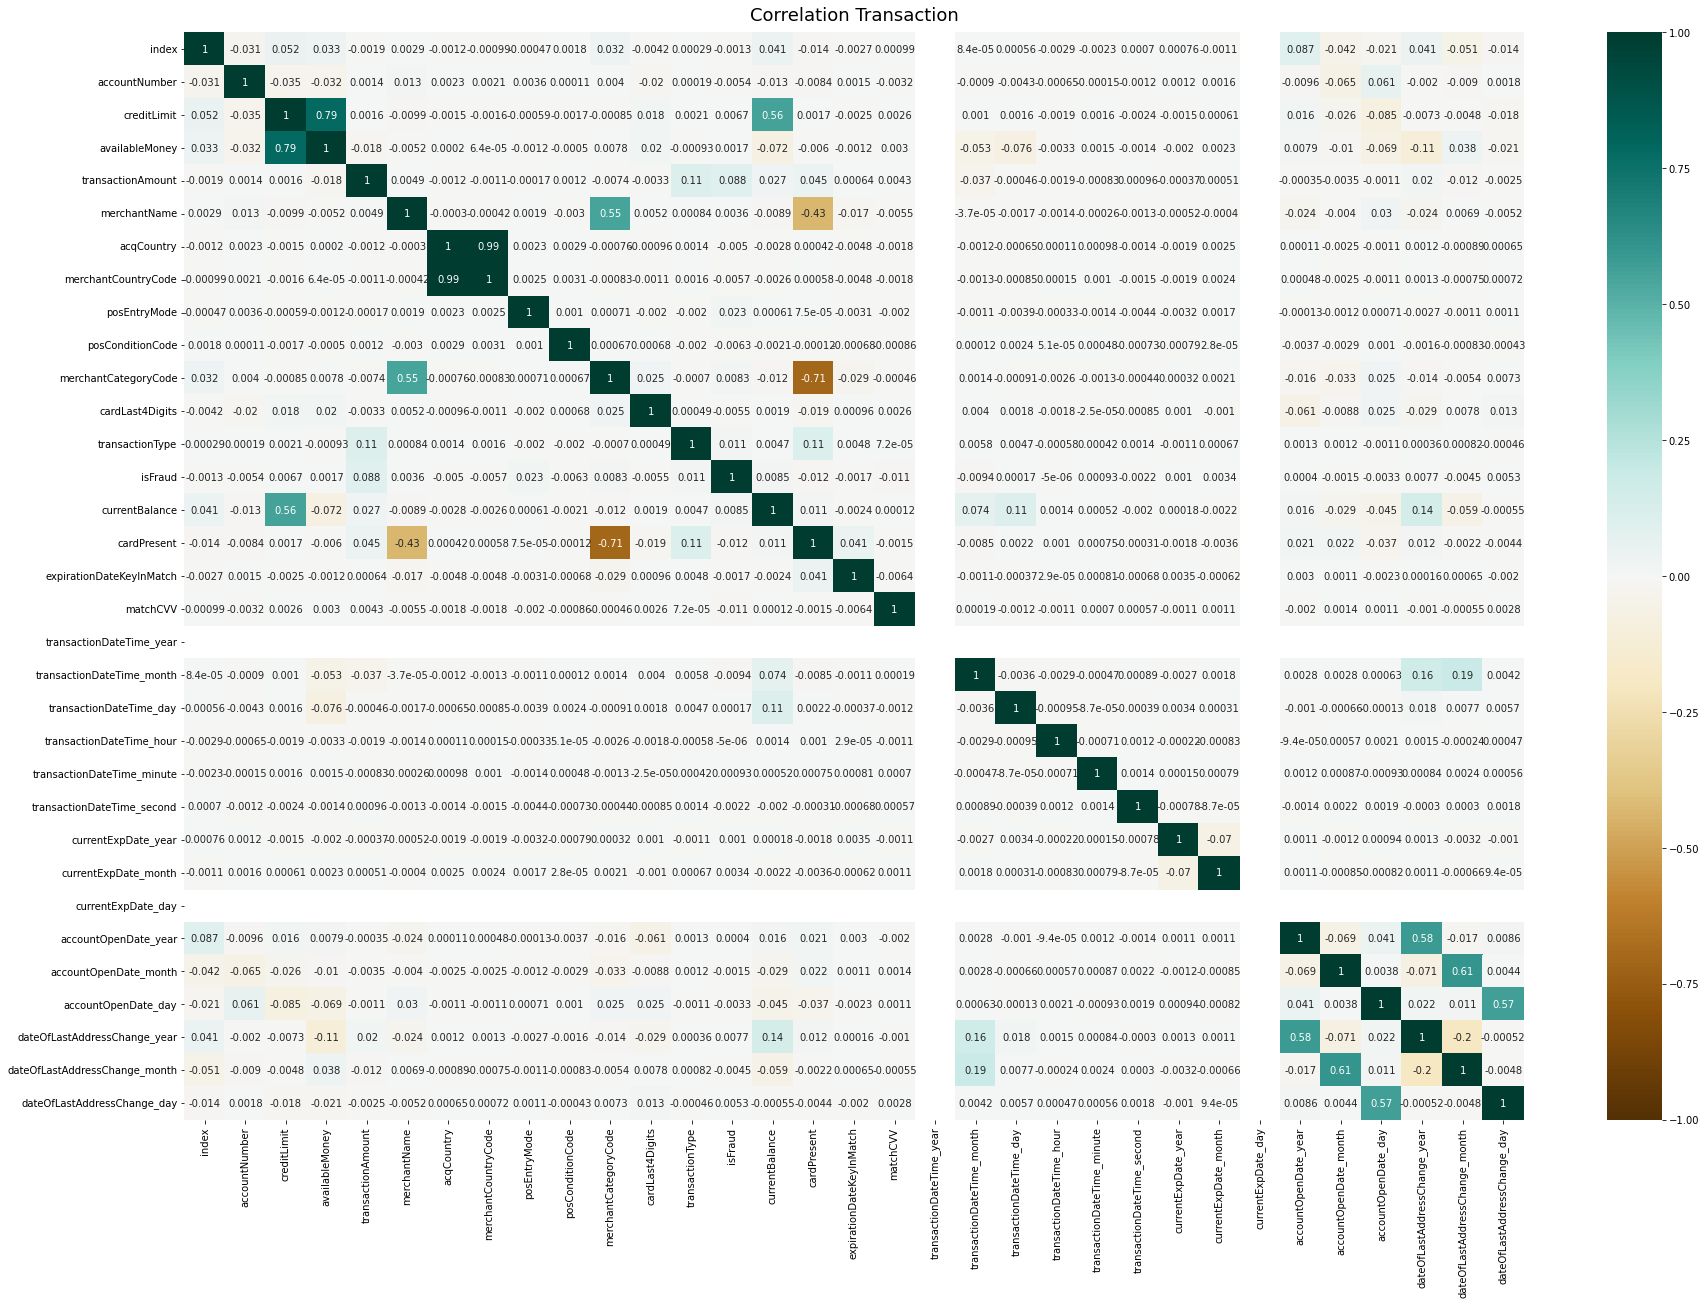

In [ ]:
#Show correlation 
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(new_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Transaction', fontdict={'fontsize':18}, pad=12);

In [ ]:
#get correlation to isFraud
corr_df=new_df.corr()
corr=corr_df.loc['isFraud'].reset_index()
corr.drop([13],inplace=True)
corr.reset_index(drop=True,inplace=True)
corr.rename(columns={'index':'column_name'},inplace=True)
corr

,column_name,isFraud
0,index,-0.001317
1,accountNumber,-0.005371
2,creditLimit,0.006689
3,availableMoney,0.001722
4,transactionAmount,0.087538
5,merchantName,0.003560
6,acqCountry,-0.005023
7,merchantCountryCode,-0.005652
8,posEntryMode,0.023409
9,posConditionCode,-0.006295


In [ ]:
#sort correlation coefficients
corr['isFraud']=corr['isFraud'].abs()
significant_var=corr.sort_values(by='isFraud',ascending=False).reset_index(drop=True)
significant_var

,column_name,isFraud
0,transactionAmount,0.087538
1,posEntryMode,0.023409
2,cardPresent,0.012343
3,matchCVV,0.011296
4,transactionType,0.010939
5,transactionDateTime_month,0.009445
6,currentBalance,0.008520
7,merchantCategoryCode,0.008301
8,dateOfLastAddressChange_year,0.007727
9,creditLimit,0.006689


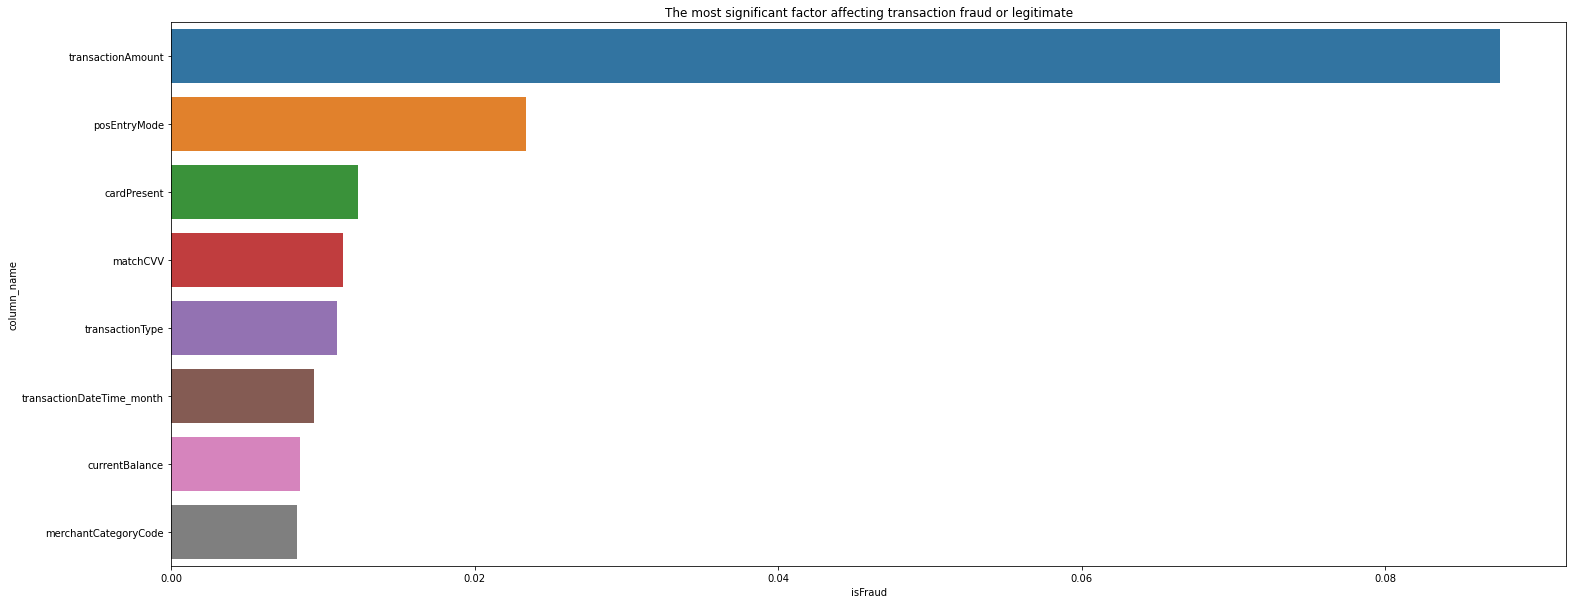

In [ ]:
# show significant variabel
plt.figure(figsize=(25,10))
plt.title('The most significant factor affecting transaction fraud or legitimate')
ax = sns.barplot(
    x='isFraud',
    y='column_name',
    data=significant_var.sort_values('isFraud', ascending=False).head(8)
)

# **Modelling**

In [ ]:
new_df2=new_df.drop([ 'index','creditLimit', 'posConditionCode', 'merchantCountryCode', 'cardLast4Digits', 'accountNumber', 'dateOfLastAddressChange_day', 'acqCountry', 
                     'dateOfLastAddressChange_month', 'merchantName', 'currentExpDate_month', 'accountOpenDate_day', 'transactionDateTime_second', 'availableMoney', 
                     'expirationDateKeyInMatch', 'accountOpenDate_month', 'currentExpDate_year', 
                     'transactionDateTime_minute', 'accountOpenDate_year', 'transactionDateTime_day', 'transactionDateTime_hour', 'transactionDateTime_year', 'currentExpDate_day'],axis=1)

In [ ]:
new_df2.dtypes

transactionAmount               float64
posEntryMode                      int64
merchantCategoryCode              int64
transactionType                   int64
isFraud                           int64
currentBalance                  float64
cardPresent                       int64
matchCVV                          int64
transactionDateTime_month         int64
dateOfLastAddressChange_year      int64
dtype: object

In [ ]:
new_df2

,transactionAmount,posEntryMode,merchantCategoryCode,transactionType,isFraud,currentBalance,cardPresent,matchCVV,transactionDateTime_month,dateOfLastAddressChange_year
0,111.33,1,17,1,1,0.00,0,1,1,2014
1,24.75,2,17,1,0,111.33,0,1,1,2014
2,187.40,1,17,1,0,136.08,0,1,1,2014
3,227.34,0,17,1,1,323.48,0,1,1,2014
4,0.00,0,17,0,0,550.82,0,1,1,2014
...,...,...,...,...,...,...,...,...,...,...
603870,5.37,1,12,1,0,4925.98,0,1,12,2016
603871,223.70,2,13,1,0,4931.35,0,1,12,2016
603872,138.42,0,13,1,0,5155.05,0,1,12,2016
603873,16.31,2,15,1,0,5293.47,0,1,12,2016


**Logistic** **Regression**

In [ ]:
#split dataset in features and target variable
y = new_df2['isFraud']
x = new_df2.drop(columns=['isFraud'], axis=1)

In [ ]:
# split x and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# describes info about train and test set
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (422712, 9)
Number transactions y_train dataset:  (422712,)
Number transactions x_test dataset:  (181163, 9)
Number transactions y_test dataset:  (181163,)


In [ ]:
#initialize logreg model
logreg = LogisticRegression(solver='lbfgs', max_iter=200)

In [ ]:
#fit the model with data
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
#predict model
y_pred = logreg.predict(x_test)

In [ ]:
#Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[177943,      0],
       [  3218,      2]])

Text(0.5, 257.44, 'Predicted label')

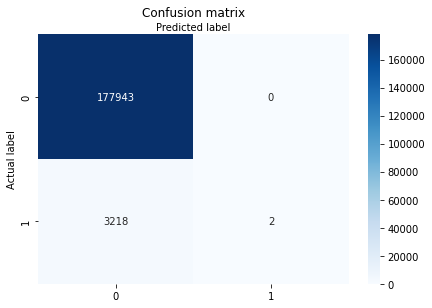

In [ ]:
#Visualizing using Confusion Matrix

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    177943
           1       1.00      0.00      0.00      3220

    accuracy                           0.98    181163
   macro avg       0.99      0.50      0.50    181163
weighted avg       0.98      0.98      0.97    181163



**Logistic** **Regression** **with** **SMOTE**

In [ ]:
#split dataset in features and target variable
y3 = new_df2['isFraud']
x3 = new_df2.drop(columns=['isFraud'], axis=1)

In [ ]:
# split x and y into training and testing sets
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3)

In [ ]:
columns_x = x_train3.columns

sm = SMOTE()
trainX_smote ,trainY_smote = sm.fit_resample(x_train3, y_train3)

trainX_smote = pd.DataFrame(data=trainX_smote,columns=columns_x)
trainY_smote = pd.DataFrame(data=trainY_smote,columns=['isFraud'])

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train3==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train3==0)))

print("After OverSampling, counts of label '1':", trainY_smote[(trainY_smote["isFraud"] == 1)].shape[0])
print("After OverSampling, counts of label '0':", trainY_smote[(trainY_smote["isFraud"] == 0)].shape[0])


Before OverSampling, counts of label '1': 7472
Before OverSampling, counts of label '0': 415240 

After OverSampling, counts of label '1': 415240
After OverSampling, counts of label '0': 415240


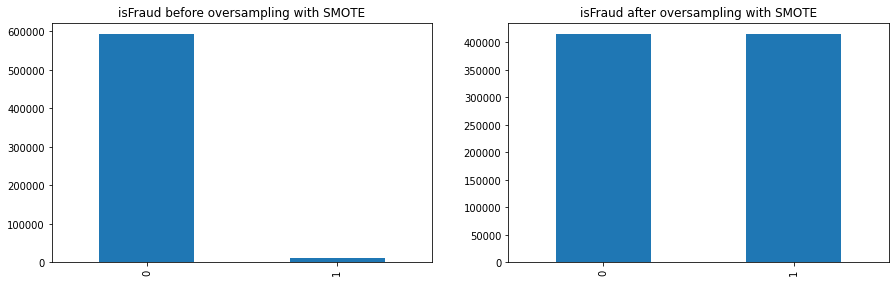

In [ ]:
fig = plt.figure(figsize=(15,15)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
new_df2['isFraud'].value_counts().plot(kind='bar', 
                                     title='isFraud before oversampling with SMOTE')

plt.subplot2grid(fig_dims, (0, 1))
trainY_smote['isFraud'].value_counts().plot(kind='bar', 
                                     title='isFraud after oversampling with SMOTE')

In [ ]:
#initialize logreg model
logreg2 = LogisticRegression(solver='lbfgs', max_iter=200)

In [ ]:
#fit the model with data
logreg2.fit(trainX_smote, trainY_smote.values.ravel())

LogisticRegression(max_iter=200)

In [ ]:
#predict model
y_pred3 = logreg2.predict(x_test3)

In [ ]:
#Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test3, y_pred3)
cnf_matrix

array([[131072,  46932],
       [  1774,   1385]])

Text(0.5, 257.44, 'Predicted label')

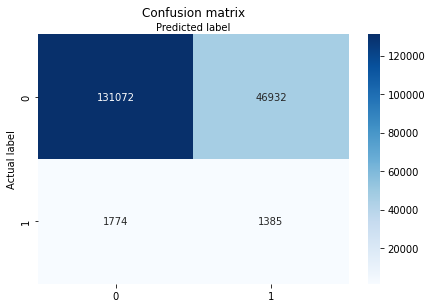

In [ ]:
#Visualizing using Confusion Matrix

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.74      0.84    178004
           1       0.03      0.44      0.05      3159

    accuracy                           0.73    181163
   macro avg       0.51      0.59      0.45    181163
weighted avg       0.97      0.73      0.83    181163



**Random** **Forest**

In [ ]:
#split dataset in features and target variable
y2 = new_df2['isFraud']
x2 = new_df2.drop(columns=['isFraud'])

In [ ]:
# split x and y into training and testing sets
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=0)

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(random_state=0)

In [ ]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train2,y_train2)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred2=clf.predict(x_test2)

In [ ]:
#Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test2, y_pred2)
cnf_matrix

array([[177942,     19],
       [  3191,     11]])

Text(0.5, 257.44, 'Predicted label')

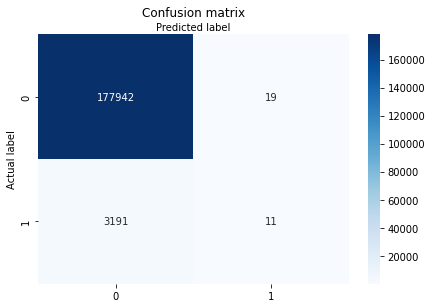

In [ ]:
#Visualizing using Confusion Matrix

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    177961
           1       0.37      0.00      0.01      3202

    accuracy                           0.98    181163
   macro avg       0.67      0.50      0.50    181163
weighted avg       0.97      0.98      0.97    181163



**Random** **Forest** **with** **SMOTE**

In [ ]:
#split dataset in features and target variable
y5 = new_df2['isFraud']
x5 = new_df2.drop(columns=['isFraud'])

In [ ]:
oversample = SMOTE()

In [ ]:
over_X, over_y = oversample.fit_resample(x5, y5)

In [ ]:
# split x and y into training and testing sets
x_train5, x_test5, y_train5, y_test5 = train_test_split(over_X, over_y, test_size=0.3)

In [ ]:
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=100)

In [ ]:
#Train SMOTE SRF
SMOTE_SRF.fit(x_train5, y_train5)

RandomForestClassifier()

In [ ]:
#SMOTE SRF prediction result
y_pred5=clf.predict(x_test5)

In [ ]:
#Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test5, y_pred5)
cnf_matrix

array([[177971,      6],
       [172908,   5062]])

Text(0.5, 257.44, 'Predicted label')

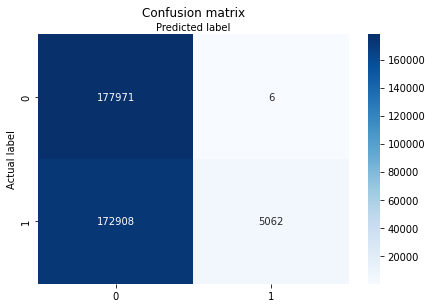

In [ ]:
#Visualizing using Confusion Matrix

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67    177977
           1       1.00      0.03      0.06    177970

    accuracy                           0.51    355947
   macro avg       0.75      0.51      0.36    355947
weighted avg       0.75      0.51      0.36    355947

